<a href="https://colab.research.google.com/github/seanmitchell1996/Data-Science-Projects/blob/main/Linear_and_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the data

In [ ]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2024-08-06 21:44:40--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2024-08-06 21:44:40--  https://ia601802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia601802.us.archive.org (ia601802.us.archive.org)... 207.241.227.72
Connecting to ia601802.us.archive.org (ia601802.us.archive.org)|207.241.227.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl’

AgesAndHeights.pkl  100%[===================>]   2.35K  --.-KB/s    in 0s      

2024-08-06 21:44:41 (637 MB/s) - ‘AgesAndHeights.pkl’ saved [2406/2406]



In [ ]:
import pandas as pd
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

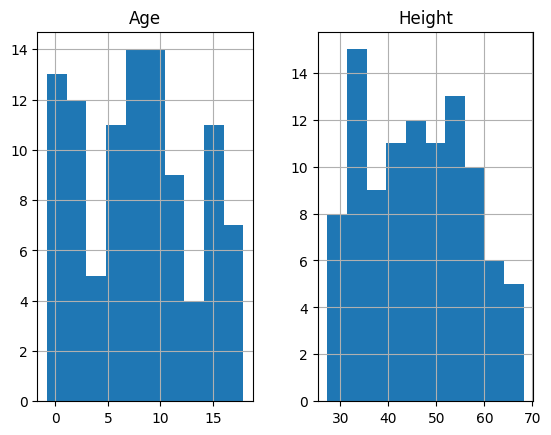

In [ ]:
raw_data.hist()

In [ ]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


Data cleaning

In [ ]:
cleaned_data = raw_data[raw_data['Age'] > 0]
cleaned_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [ ]:
cleaned_data.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


Visualize the cleaned data

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

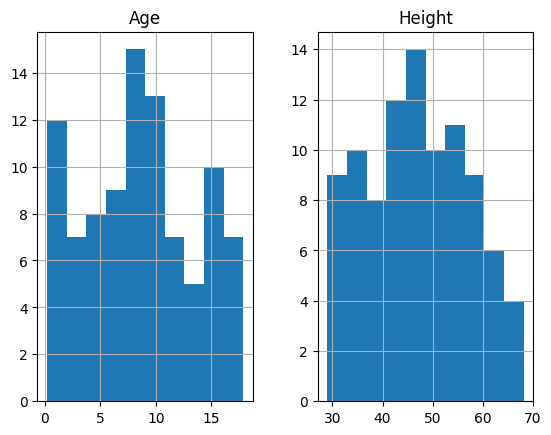

In [ ]:
cleaned_data.hist()

Text(0, 0.5, 'Height (Inches)')

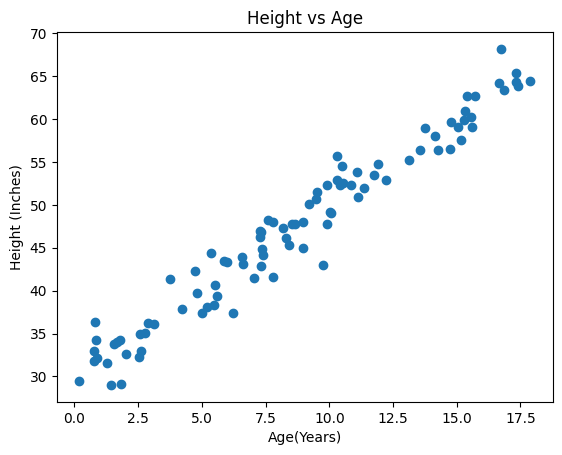

In [ ]:
import matplotlib.pyplot as plt
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label = 'Raw Data')
plt.title('Height vs Age')
plt.xlabel('Age(Years)')
plt.ylabel('Height (Inches)')

Build the model and train it

In [ ]:
def find_intercept_slope(data, possible_param):
  x,y = data['Age'], data['Height']
  x_bar, y_bar = x.mean(), y.mean()
  x,y = x.to_numpy(), y.to_numpy()
  beta = sum(((x-x_bar) * (y-y_bar)) / sum((x-x_bar)**2))
  alpha = y_bar - beta * x_bar
  possible_param['intercept'] = alpha
  possible_param['slope'] = beta

In [ ]:
parameters = {'intercept': 15, 'slope': 4}
find_intercept_slope(cleaned_data, parameters)
parameters

{'intercept': 29.96185761461583, 'slope': 2.0014168989106316}

Text(0, 0.5, 'Height (Inches)')

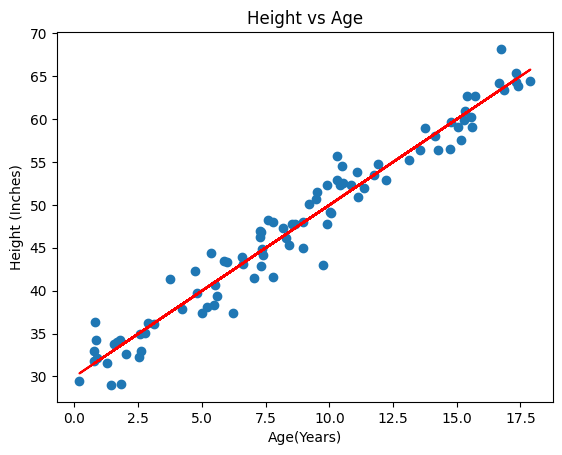

In [ ]:
trained_predictions = parameters['intercept'] + parameters['slope'] * cleaned_data['Age']
plt.plot(cleaned_data['Age'], trained_predictions, color = 'red')
plt.scatter(ages,heights, label = 'Raw Data')
plt.title('Height vs Age')
plt.xlabel('Age(Years)')
plt.ylabel('Height (Inches)')

Use the model make some predictions on unseen data

In [ ]:
y_hat = parameters['slope'] * 5 + parameters['intercept']
y_hat

39.96894210916899

Analyze model perfomance

In [ ]:
!pip install statsmodels==0.13.5
import statsmodels.api as sm

X = cleaned_data['Age']
y = cleaned_data['Height']
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.2
    Uninstalling statsmodels-0.14.2:
      Successfully uninstalled statsmodels-0.14.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.4 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.
                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1929.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           4.68e-63
Time:                        21:44:54   Log-Likelihood:                -203.1

High R square and low p value values mean the model fits pretty well

Note ** Data was trained with small sample size of individuals ages 0 - 18 in years

Putting the model into performance. Will prompt for age and it will give height

In [ ]:
# Prompt the user for age
user_age = float(input("Enter age from 1 - 18: "))

# Predict height
predicted_height = parameters['intercept'] + parameters['slope'] * user_age

print("Predicted height in inches:", predicted_height.round(2))

Enter age from 1 - 18: 2
Predicted height in inches: 33.96


Trying a different model (Polynomial Regression)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


# Transform the features to include polynomial terms
poly = PolynomialFeatures(degree=2) # You can change the degree
X_poly = poly.fit_transform(cleaned_data[['Age']])

# Fit a linear regression model on the transformed features
model_poly = LinearRegression().fit(X_poly, cleaned_data['Height'])

# Predict height
predicted_height = model_poly.predict(poly.transform([[user_age]]))
X_train, X_test, y_train, y_test = train_test_split(cleaned_data[['Age']], cleaned_data['Height'], test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Transform features for both training and testing sets
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the model on the training set
model_poly = LinearRegression().fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model_poly.predict(X_test_poly)
poly = PolynomialFeatures(degree=2)  # Choose your desired degree
X_poly = poly.fit_transform(cleaned_data[['Age']])
X_poly_with_const = sm.add_constant(X_poly)  # Add a constant for the intercept term
model_statsmodels = sm.OLS(cleaned_data['Height'], X_poly_with_const).fit()
print(model_statsmodels.summary())
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     955.2
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.45e-61
Time:                        22:29:10   Log-Likelihood:                -203.14
No. Observations:                  93   AIC:                             412.3
Df Residuals:                      90   BIC:                             419.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7996      0.678     43.944      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_data[['Age']], cleaned_data['Height'], test_size=0.2, random_state=42)

# --- Linear Regression ---
# Create and fit the linear regression model
model_linear = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = model_linear.predict(X_test)

# --- Polynomial Regression ---
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the polynomial regression model
model_poly = LinearRegression().fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = model_poly.predict(X_test_poly)

# --- Evaluate Model Performance ---
# Calculate and print MSE and RMSE for both models
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_linear))
print("RMSE:", mean_squared_error(y_test, y_pred_linear, squared=False))

print("\nPolynomial Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("RMSE:", mean_squared_error(y_test, y_pred_poly, squared=False))

Linear Regression:
MSE: 3.870169406686577
RMSE: 1.9672746139485908

Polynomial Regression:
MSE: 3.8600155931599724
RMSE: 1.96469223878957


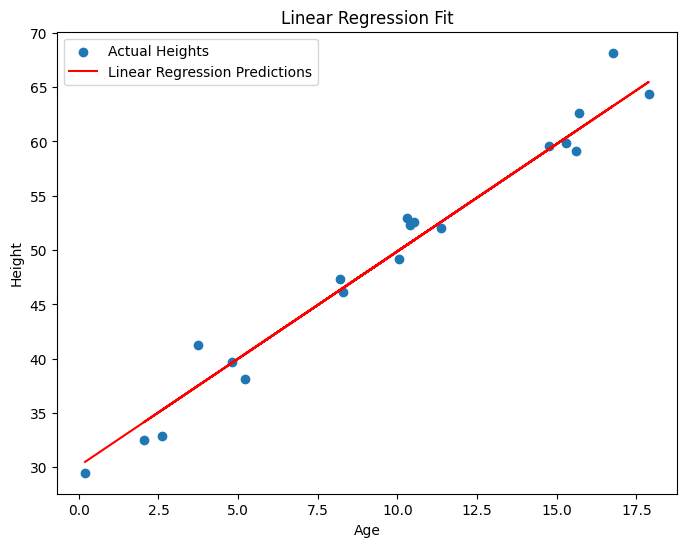

<ipython-input-37-6d429109d027>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_range = pd.DataFrame({'Age': np.linspace(X_test.min()[0], X_test.max()[0], 100)}) # Now np is defined


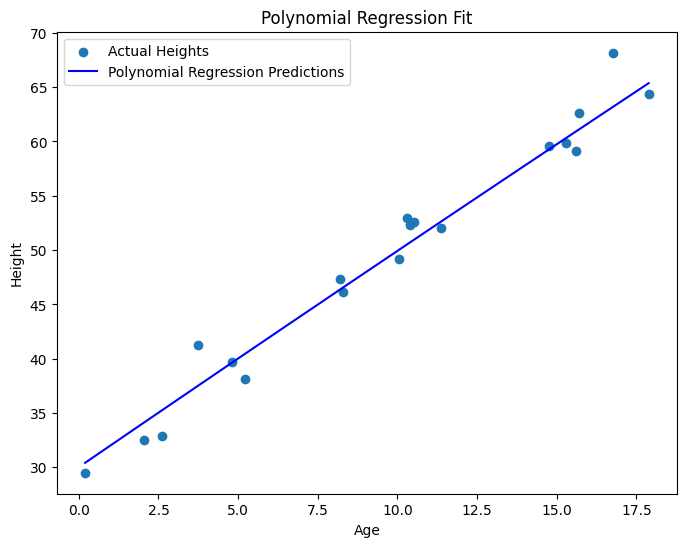

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy for linspace


# --- Visualize Linear Regression ---
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label="Actual Heights")
plt.plot(X_test, y_pred_linear, color='red', label="Linear Regression Predictions")
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# --- Visualize Polynomial Regression ---
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label="Actual Heights")

# Create a range of ages for plotting the smooth curve
X_range = pd.DataFrame({'Age': np.linspace(X_test.min()[0], X_test.max()[0], 100)}) # Now np is defined
X_range_poly = poly.transform(X_range)
y_pred_range = model_poly.predict(X_range_poly)

plt.plot(X_range['Age'], y_pred_range, color='blue', label="Polynomial Regression Predictions")
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()